In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_i=pd.read_csv("/content/INFY.NS.csv")
df_r=pd.read_csv("/content/RELIANCE.NS_stock_data.csv")
df_t=pd.read_csv("/content/TCS.NS.csv")


In [21]:

print(df_i.head())
print(df_r.head())
print(df_t.head())


        date      open      high       low     close  adj close    volume
0 1996-01-01  0.794921  0.796679  0.791015  0.796679   0.549483  204800.0
1 1996-01-02  0.794921  0.798828  0.793457  0.793457   0.547260  204800.0
2 1996-01-03  0.798828  0.798828  0.798828  0.798828   0.550965  102400.0
3 1996-01-04  0.791015  0.794921  0.791015  0.793554   0.547327  307200.0
4 1996-01-05  0.784179  0.784179  0.784179  0.784179   0.540861   51200.0
        date       open       high        low      close  adjclose  \
0 1996-01-01  14.638248  14.716795  14.541850  14.691803  9.302442   
1 1996-01-02  14.656100  14.727506  14.470444  14.577553  9.230102   
2 1996-01-03  14.816763  15.491551  14.656100  14.688232  9.300181   
3 1996-01-04  14.548991  14.595404  14.356194  14.552561  9.214279   
4 1996-01-05  14.495436  14.495436  14.327632  14.452592  9.150979   

        volume       ticker  
0   52060684.0  RELIANCE.NS  
1   84371654.0  RELIANCE.NS  
2  104661939.0  RELIANCE.NS  
3  108450132.0 

In [22]:
# Rename the 'Unnamed: 0' column to 'Date'
df_r = df_r.rename(columns={'Unnamed: 0': 'Date'})
print(df_r.columns)

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')


In [23]:

df_i.info()
df_r.info()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6501 entries, 0 to 6500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6501 non-null   datetime64[ns]
 1   open       6487 non-null   float64       
 2   high       6487 non-null   float64       
 3   low        6487 non-null   float64       
 4   close      6487 non-null   float64       
 5   adj close  6487 non-null   float64       
 6   volume     6487 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 355.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      7124 non-null   datetime64[ns]
 1   open      7114 non-null   float64       
 2   high      7114 non-null   float64       
 3   low       7114 non-null   float64       
 4   close     7114 non-null

In [26]:
# Converting the date column to DateTime format
df_i['Date'] = pd.to_datetime(df_i['date'])
df_r['Date'] = pd.to_datetime(df_r['date'])
df_t['Date'] = pd.to_datetime(df_t['date'])

In [27]:
print(df_i.columns)  # Infosys dataset
print(df_r.columns)  # Reliance dataset
print(df_t.columns)  # TCS dataset


Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'Date'], dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'Date'],
      dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'Date'], dtype='object')


In [7]:
# Check the data types of the columns in the Reliance dataset
df_r.dtypes


,0
Date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
adjclose,float64
volume,float64
ticker,object


In [28]:
df_r.head()

,date,open,high,low,close,adjclose,volume,ticker,Date
0,1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302442,52060684.0,RELIANCE.NS,1996-01-01
1,1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230102,84371654.0,RELIANCE.NS,1996-01-02
2,1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300181,104661939.0,RELIANCE.NS,1996-01-03
3,1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214279,108450132.0,RELIANCE.NS,1996-01-04
4,1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150979,83354233.0,RELIANCE.NS,1996-01-05


In [29]:
# Filter data between 2019 and 2021
df_i_filtered = df_i[(df_i['Date'].dt.year >= 2019) & (df_i['Date'].dt.year <= 2021)]
df_r_filtered = df_r[(df_r['Date'].dt.year >= 2019) & (df_r['Date'].dt.year <= 2021)]
df_t_filtered = df_t[(df_t['Date'].dt.year >= 2019) & (df_t['Date'].dt.year <= 2021)]


In [39]:
# Check the columns in each dataset
print("Reliance columns:\n", df_r_filtered.columns)
print("TCS columns:\n", df_t_filtered.columns)
print("Infosys columns:\n", df_i_filtered.columns)


Reliance columns:
 Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'Date', 'Price/Volume', 'Price_Change'],
      dtype='object')
TCS columns:
 Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'Date'], dtype='object')
Infosys columns:
 Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'Date'], dtype='object')


In [42]:
# Function to calculate common-size statement
def common_size_statement(df, columns, date_column):
    df_cs = df.copy()
    # Ensure the date column is in datetime format
    df_cs[date_column] = pd.to_datetime(df_cs[date_column])
    # Calculate totals by year
    total = df.groupby(df_cs[date_column].dt.year)[columns].sum()
    # Calculate common-size values as a percentage of the total for the year
    for col in columns:
        df_cs[col] = df[col] / df[date_column].dt.year.map(total[col]) * 100
    return df_cs

# Correct column names for each dataset
common_columns = ['open', 'high', 'low', 'close', 'volume']  # Adjusted column names

# Generate common-size statements for each dataset
df_r_cs = common_size_statement(df_r_filtered, common_columns, 'date')
df_t_cs = common_size_statement(df_t_filtered, common_columns, 'date')
df_i_cs = common_size_statement(df_i_filtered, common_columns, 'date')

# Display first few rows of the common-size statement for Reliance
print("Reliance Common-Size Statement:\n", df_r_cs.head())


Reliance Common-Size Statement:
            date      open      high       low     close     adjclose  \
5810 2019-01-01  0.349944  0.346996  0.349228  0.348981  1004.360229   
5811 2019-01-02  0.346601  0.346903  0.346365  0.344436   991.279419   
5812 2019-01-03  0.344424  0.343086  0.342936  0.340187   979.049805   
5813 2019-01-04  0.341283  0.339962  0.340105  0.342023   984.335754   
5814 2019-01-07  0.344269  0.344271  0.346365  0.343922   989.801147   

        volume       ticker       Date  Price/Volume  Price_Change  
5810  0.203742  RELIANCE.NS 2019-01-01      0.000210           NaN  
5811  0.326702  RELIANCE.NS 2019-01-02      0.000129     -1.302401  
5812  0.340487  RELIANCE.NS 2019-01-03      0.000123     -1.233732  
5813  0.387066  RELIANCE.NS 2019-01-04      0.000109      0.539919  
5814  0.252106  RELIANCE.NS 2019-01-07      0.000168      0.555229  


In [44]:
# Indexed Statement Calculation
def calculate_indexed_statements(df, columns, date_column):
    indexed_df = df.copy()
    # Ensure date column is in datetime format
    indexed_df[date_column] = pd.to_datetime(indexed_df[date_column])

    # Get data for base year (2019) and calculate the mean for each column
    base_year_data = indexed_df[indexed_df[date_column].dt.year == 2019][columns].mean()

    # Calculate indexed values for each column
    for col in columns:
        indexed_df[col] = (indexed_df[col] / base_year_data[col]) * 100

    return indexed_df

# Common columns across datasets
reliance_columns = ['open', 'high', 'low', 'close', 'volume']
financial_columns = ['open', 'high', 'low', 'close', 'volume']

# Generate indexed statements for each dataset
df_r_indexed = calculate_indexed_statements(df_r_filtered, reliance_columns, 'date')
df_t_indexed = calculate_indexed_statements(df_t_filtered, financial_columns, 'date')
df_i_indexed = calculate_indexed_statements(df_i_filtered, financial_columns, 'date')

# Display the first few rows of the indexed statement for Reliance
print("Reliance Indexed Statement:\n", df_r_indexed.head())


Reliance Indexed Statement:
            date       open       high        low      close     adjclose  \
5810 2019-01-01  85.036459  84.319916  84.862433  84.802451  1004.360229   
5811 2019-01-02  84.224067  84.297478  84.166777  83.697983   991.279419   
5812 2019-01-03  83.695069  83.369977  83.333521  82.665374   979.049805   
5813 2019-01-04  82.931802  82.610778  82.645509  83.111700   984.335754   
5814 2019-01-07  83.657284  83.657952  84.166777  83.573161   989.801147   

         volume       ticker       Date  Price/Volume  Price_Change  
5810  49.509385  RELIANCE.NS 2019-01-01      0.000210           NaN  
5811  79.388465  RELIANCE.NS 2019-01-02      0.000129     -1.302401  
5812  82.738312  RELIANCE.NS 2019-01-03      0.000123     -1.233732  
5813  94.057017  RELIANCE.NS 2019-01-04      0.000109      0.539919  
5814  61.261697  RELIANCE.NS 2019-01-07      0.000168      0.555229  


In [48]:
# Price/Volume and Price Change Calculation
def calculate_ratios_adjusted(df, close_col, volume_col):
    df['Price/Volume'] = df[close_col] / df[volume_col]  # Price to Volume ratio
    df['Price_Change'] = df[close_col].pct_change() * 100  # Percentage change in price
    return df

# Apply ratio calculations for each dataset using correct column names
df_r_ratios = calculate_ratios_adjusted(df_r_filtered, 'close', 'volume')
df_t_ratios = calculate_ratios_adjusted(df_t_filtered, 'close', 'volume')
df_i_ratios = calculate_ratios_adjusted(df_i_filtered, 'close', 'volume')

# Display the first few rows of each DataFrame with the new ratios
print("Reliance Ratios:\n", df_r_ratios[['date', 'Price/Volume', 'Price_Change']].head())
print("TCS Ratios:\n", df_t_ratios[['date', 'Price/Volume', 'Price_Change']].head())
print("Infosys Ratios:\n", df_i_ratios[['date', 'Price/Volume', 'Price_Change']].head())



Reliance Ratios:
            date  Price/Volume  Price_Change
5810 2019-01-01      0.000210           NaN
5811 2019-01-02      0.000129     -1.302401
5812 2019-01-03      0.000123     -1.233732
5813 2019-01-04      0.000109      0.539919
5814 2019-01-07      0.000168      0.555229
TCS Ratios:
            date  Price/Volume  Price_Change
4085 2019-01-01      0.001738           NaN
4086 2019-01-02      0.000916      1.077360
4087 2019-01-03      0.000727     -1.214064
4088 2019-01-04      0.000438     -1.215820
4089 2019-01-07      0.001022      1.121563
Infosys Ratios:
            date  Price/Volume  Price_Change
5810 2019-01-01      0.000226           NaN
5811 2019-01-02      0.000090      0.601459
5812 2019-01-03      0.000098      0.014952
5813 2019-01-04      0.000084     -1.210496
5814 2019-01-07      0.000083      1.611077


<ipython-input-48-627439203837>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price/Volume'] = df[close_col] / df[volume_col]  # Price to Volume ratio
<ipython-input-48-627439203837>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Change'] = df[close_col].pct_change() * 100  # Percentage change in price
<ipython-input-48-627439203837>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [49]:
# Standardize column names to lowercase for all datasets
df_r.columns = df_r.columns.str.lower()
df_t.columns = df_t.columns.str.lower()
df_i.columns = df_i.columns.str.lower()

# Verify the column names are consistent
print(df_r.columns)
print(df_t.columns)
print(df_i.columns)


Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'date'],
      dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'date'], dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'date'], dtype='object')


In [50]:

df_i.info()
df_r.info()
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6501 entries, 0 to 6500
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6501 non-null   datetime64[ns]
 1   open       6487 non-null   float64       
 2   high       6487 non-null   float64       
 3   low        6487 non-null   float64       
 4   close      6487 non-null   float64       
 5   adj close  6487 non-null   float64       
 6   volume     6487 non-null   float64       
 7   date       6501 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(6)
memory usage: 406.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      7124 non-null   datetime64[ns]
 1   open      7114 non-null   float64       
 2   high      7114 non-null   float64       
 3   low       7114 non-nul

In [51]:
# Example: Summarizing Price/Volume Ratios and Price Change for Reliance
df_r_summary = df_r_ratios[['Date', 'close', 'Price/Volume', 'Price_Change']].head()
print("Reliance Price/Volume and Price Change Summary:")
print(df_r_summary)

# You can create similar summaries for TCS and Infosys


Reliance Price/Volume and Price Change Summary:
           Date        close  Price/Volume  Price_Change
5810 2019-01-01  1024.966919      0.000210           NaN
5811 2019-01-02  1011.617737      0.000129     -1.302401
5812 2019-01-03   999.137085      0.000123     -1.233732
5813 2019-01-04  1004.531616      0.000109      0.539919
5814 2019-01-07  1010.109070      0.000168      0.555229


In [53]:
# Function to calculate average closing price trend by year
def calculate_price_trend(df, date_col, close_col):
    # Ensure the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col])
    # Group by year and calculate the average closing price
    return df.groupby(df[date_col].dt.year)[close_col].mean()

# Calculate average price trend for Reliance, TCS, and Infosys
price_trend_r = calculate_price_trend(df_r_filtered, 'date', 'close')
price_trend_t = calculate_price_trend(df_t_filtered, 'date', 'close')
price_trend_i = calculate_price_trend(df_i_filtered, 'date', 'close')

# Display the average price trends for each company
print("Price Trend - Reliance:\n", price_trend_r)
print("Price Trend - TCS:\n", price_trend_t)
print("Price Trend - Infosys:\n", price_trend_i)


Price Trend - Reliance:
 date
2019    1208.652469
2020    1606.382479
2021    2030.336718
Name: close, dtype: float64
Price Trend - TCS:
 date
2019    2101.155585
2020    2261.548799
2021    3270.709244
Name: close, dtype: float64
Price Trend - Infosys:
 date
2019     741.696692
2020     869.575402
2021    1477.304828
Name: close, dtype: float64


<ipython-input-53-1a2846752232>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])
<ipython-input-53-1a2846752232>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])
<ipython-input-53-1a2846752232>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [60]:
# Calculate price/volume ratio trend for each company
def calculate_price_volume_ratio_trend(df, date_col, close_col, volume_col):
    df['Price/Volume'] = df[close_col] / df[volume_col]
    df[date_col] = pd.to_datetime(df[date_col])
    return df.groupby(df[date_col].dt.year)['Price/Volume'].mean()

# Correcting column names for TCS and Infosys datasets
price_volume_trend_r = calculate_price_volume_ratio_trend(df_r_filtered, 'date', 'close', 'volume')
price_volume_trend_t = calculate_price_volume_ratio_trend(df_t_filtered, 'date', 'close', 'volume')
price_volume_trend_i = calculate_price_volume_ratio_trend(df_i_filtered, 'date', 'close', 'volume')

print("Price/Volume Trend - Reliance:\n", price_volume_trend_r)
print("Price/Volume Trend - TCS:\n", price_volume_trend_t)
print("Price/Volume Trend - Infosys:\n", price_volume_trend_i)



Price/Volume Trend - Reliance:
 date
2019    0.000144
2020    0.000112
2021    0.000302
Name: Price/Volume, dtype: float64
Price/Volume Trend - TCS:
 date
2019    0.000833
2020    0.000699
2021    0.001392
Name: Price/Volume, dtype: float64
Price/Volume Trend - Infosys:
 date
2019    0.000107
2020    0.000102
2021    0.000246
Name: Price/Volume, dtype: float64


<ipython-input-60-152ef49a76f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price/Volume'] = df[close_col] / df[volume_col]
<ipython-input-60-152ef49a76f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])
<ipython-input-60-152ef49a76f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [61]:
# Function to calculate growth rate
def calculate_growth_rate(df, date_col, close_col):
    # Ensure the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col])
    # Group by year and calculate the percentage change in average closing price
    return df.groupby(df[date_col].dt.year)[close_col].mean().pct_change() * 100

# Correcting column names for TCS and Infosys datasets
price_growth_r = calculate_growth_rate(df_r_filtered, 'date', 'close')
price_growth_t = calculate_growth_rate(df_t_filtered, 'date', 'close')
price_growth_i = calculate_growth_rate(df_i_filtered, 'date', 'close')

# Display the price growth rates for each company
print("Price Growth Rate - Reliance:\n", price_growth_r)
print("Price Growth Rate - TCS:\n", price_growth_t)
print("Price Growth Rate - Infosys:\n", price_growth_i)



Price Growth Rate - Reliance:
 date
2019          NaN
2020    32.906896
2021    26.391861
Name: close, dtype: float64
Price Growth Rate - TCS:
 date
2019          NaN
2020     7.633572
2021    44.622537
Name: close, dtype: float64
Price Growth Rate - Infosys:
 date
2019          NaN
2020    17.241375
2021    69.888065
Name: close, dtype: float64


<ipython-input-61-85adbe298e84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])
<ipython-input-61-85adbe298e84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])
<ipython-input-61-85adbe298e84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

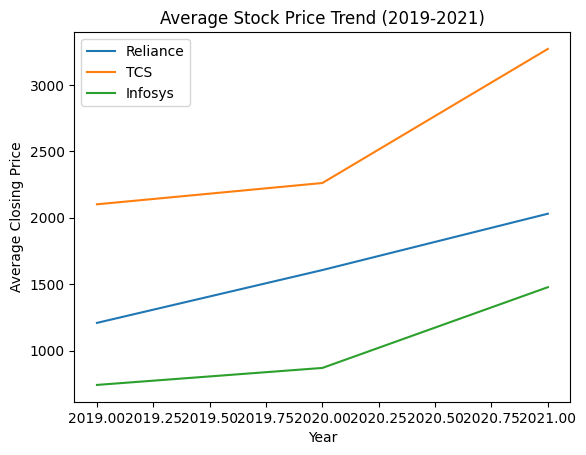

In [68]:
import matplotlib.pyplot as plt

# Plotting price trends for all companies
plt.plot(price_trend_r.index, price_trend_r.values, label="Reliance")
plt.plot(price_trend_t.index, price_trend_t.values, label="TCS")
plt.plot(price_trend_i.index, price_trend_i.values, label="Infosys")

plt.title("Average Stock Price Trend (2019-2021)")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.legend()
plt.show()


In [69]:
import pandas as pd

# Define a function to compute year-over-year trends
def calculate_yearly_trends(df, date_column, close_col, volume_col):
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])

    # Create a 'Year' column from the date
    df['Year'] = df[date_column].dt.year

    # Group by 'Year' and calculate trends
    trends = df.groupby('Year').agg(
        avg_price_change=pd.NamedAgg(column=close_col, aggfunc=lambda x: x.pct_change().mean() * 100),
        avg_volume_change=pd.NamedAgg(column=volume_col, aggfunc=lambda x: x.pct_change().mean() * 100),
        avg_price_volume_ratio=pd.NamedAgg(column=close_col, aggfunc=lambda x: (x / df[volume_col]).mean())
    )
    return trends.reset_index()

# Apply the function to each dataset with correct column names
reliance_trends = calculate_yearly_trends(df_r_filtered, 'date', 'close', 'volume')
tcs_trends = calculate_yearly_trends(df_t_filtered, 'date', 'close', 'volume')  # lowercase 'close' and 'volume'
infosys_trends = calculate_yearly_trends(df_i_filtered, 'date', 'close', 'volume')  # lowercase 'close' and 'volume'

# Display the results
print("Reliance Yearly Trends:\n", reliance_trends)
print("TCS Yearly Trends:\n", tcs_trends)
print("Infosys Yearly Trends:\n", infosys_trends)


Reliance Yearly Trends:
    Year  avg_price_change  avg_volume_change  avg_price_volume_ratio
0  2019          0.138569          12.216870                0.000144
1  2020          0.156775          11.376506                0.000112
2  2021          0.084217          14.606574                0.000302
TCS Yearly Trends:
    Year  avg_price_change  avg_volume_change  avg_price_volume_ratio
0  2019          0.063125          11.267168                0.000833
1  2020          0.135592          10.278136                0.000699
2  2021          0.150111           9.635281                0.001392
Infosys Yearly Trends:
    Year  avg_price_change  avg_volume_change  avg_price_volume_ratio
0  2019          0.055158          15.451169                0.000107
1  2020          0.245039          12.417054                0.000102
2  2021          0.196729           9.002282                0.000246


<ipython-input-69-5e8f4a308968>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
<ipython-input-69-5e8f4a308968>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df[date_column].dt.year
<ipython-input-69-5e8f4a308968>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

<ipython-input-70-588ed8fb2946>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
<ipython-input-70-588ed8fb2946>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df[date_column].dt.year
<ipython-input-70-588ed8fb2946>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

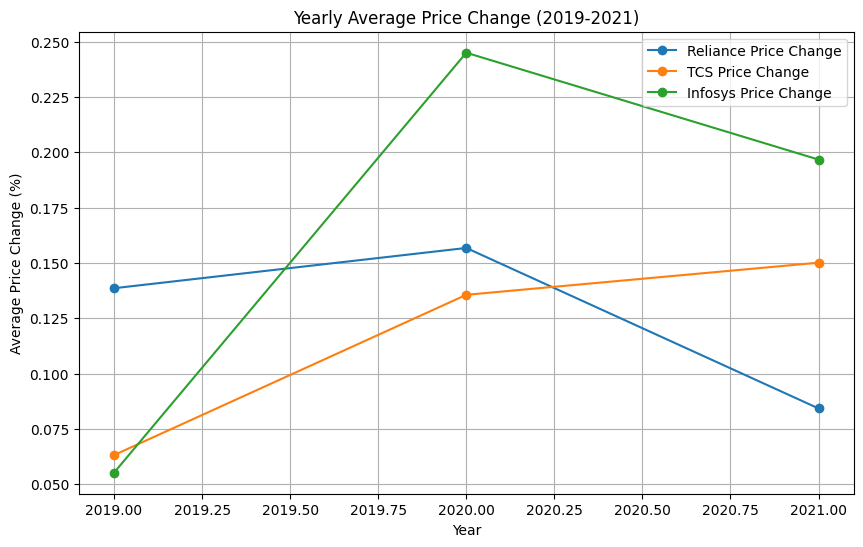

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to compute year-over-year trends
def calculate_yearly_trends(df, date_column, close_col, volume_col):
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])

    # Create a 'Year' column from the date
    df['Year'] = df[date_column].dt.year

    # Group by 'Year' and calculate trends
    trends = df.groupby('Year').agg(
        avg_price_change=pd.NamedAgg(column=close_col, aggfunc=lambda x: x.pct_change().mean() * 100),
        avg_volume_change=pd.NamedAgg(column=volume_col, aggfunc=lambda x: x.pct_change().mean() * 100),
        avg_price_volume_ratio=pd.NamedAgg(column=close_col, aggfunc=lambda x: (x / df[volume_col]).mean())
    )
    return trends.reset_index()

# Apply the function to each dataset with correct column names
reliance_trends = calculate_yearly_trends(df_r_filtered, 'date', 'close', 'volume')
tcs_trends = calculate_yearly_trends(df_t_filtered, 'date', 'close', 'volume')  # lowercase 'close' and 'volume'
infosys_trends = calculate_yearly_trends(df_i_filtered, 'date', 'close', 'volume')  # lowercase 'close' and 'volume'

# Plot the trends for Price Change
plt.figure(figsize=(10, 6))
plt.plot(reliance_trends['Year'], reliance_trends['avg_price_change'], label='Reliance Price Change', marker='o')
plt.plot(tcs_trends['Year'], tcs_trends['avg_price_change'], label='TCS Price Change', marker='o')
plt.plot(infosys_trends['Year'], infosys_trends['avg_price_change'], label='Infosys Price Change', marker='o')

plt.title('Yearly Average Price Change (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Average Price Change (%)')
plt.legend()
plt.grid(True)

plt.show()



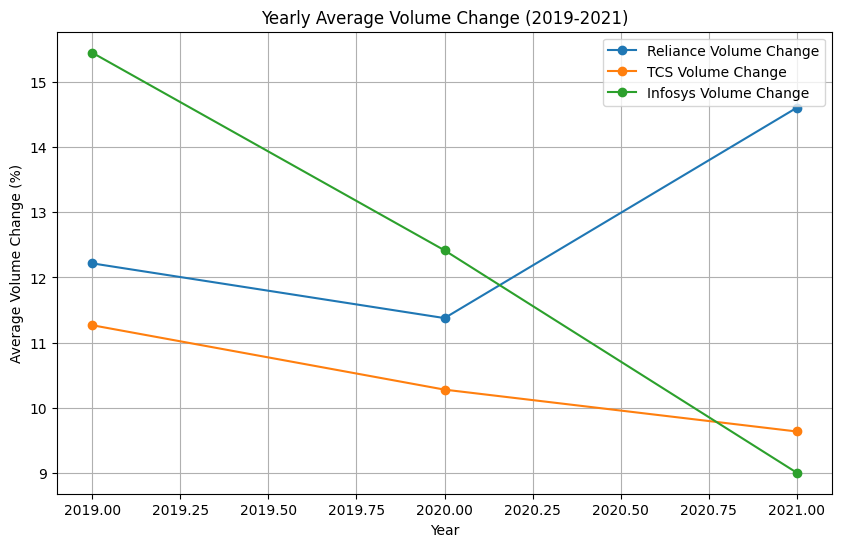

In [71]:
# Plot the trends for Volume Change
plt.figure(figsize=(10, 6))
plt.plot(reliance_trends['Year'], reliance_trends['avg_volume_change'], label='Reliance Volume Change', marker='o')
plt.plot(tcs_trends['Year'], tcs_trends['avg_volume_change'], label='TCS Volume Change', marker='o')
plt.plot(infosys_trends['Year'], infosys_trends['avg_volume_change'], label='Infosys Volume Change', marker='o')

plt.title('Yearly Average Volume Change (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Average Volume Change (%)')
plt.legend()
plt.grid(True)
plt.show()


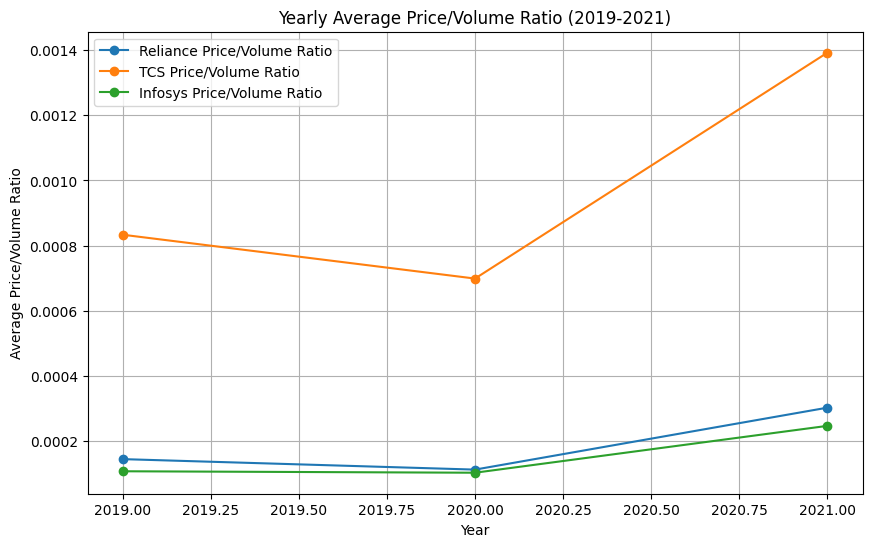

In [90]:
# Plot the trends for Price/Volume Ratio
plt.figure(figsize=(10, 6))
plt.plot(reliance_trends['Year'], reliance_trends['avg_price_volume_ratio'], label='Reliance Price/Volume Ratio', marker='o')
plt.plot(tcs_trends['Year'], tcs_trends['avg_price_volume_ratio'], label='TCS Price/Volume Ratio', marker='o')
plt.plot(infosys_trends['Year'], infosys_trends['avg_price_volume_ratio'], label='Infosys Price/Volume Ratio', marker='o')

plt.title('Yearly Average Price/Volume Ratio (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Average Price/Volume Ratio')
plt.legend()
plt.grid(True)
plt.show()


In [91]:
def investment_recommendation(trends_df, company_name):
    # Define thresholds for recommendations
    avg_price_change = trends_df['avg_price_change'].mean()
    avg_volume_change = trends_df['avg_volume_change'].mean()
    avg_price_volume_ratio = trends_df['avg_price_volume_ratio'].mean()

    # Recommendation based on trends
    if avg_price_change > 0 and avg_volume_change > 0 and avg_price_volume_ratio > 0:
        recommendation = "Buy"
    elif avg_price_change > 0:
        recommendation = "Hold"
    else:
        recommendation = "Sell"

    print(f"Investment Recommendation for {company_name}: {recommendation}")
    print(f"Average Price Change: {avg_price_change:.2f}%")
    print(f"Average Volume Change: {avg_volume_change:.2f}%")
    print(f"Average Price/Volume Ratio: {avg_price_volume_ratio:.2f}\n")

    return recommendation

# Call the function for each company
reliance_recommendation = investment_recommendation(reliance_trends, "Reliance")
tcs_recommendation = investment_recommendation(tcs_trends, "TCS")
infosys_recommendation = investment_recommendation(infosys_trends, "Infosys")


Investment Recommendation for Reliance: Buy
Average Price Change: 0.13%
Average Volume Change: 12.73%
Average Price/Volume Ratio: 0.00

Investment Recommendation for TCS: Buy
Average Price Change: 0.12%
Average Volume Change: 10.39%
Average Price/Volume Ratio: 0.00

Investment Recommendation for Infosys: Buy
Average Price Change: 0.17%
Average Volume Change: 12.29%
Average Price/Volume Ratio: 0.00



In [78]:
# Print column names for all dataframes
print("Infosys columns:", df_i.columns)
print("Reliance columns:", df_r.columns)
print("TCS columns:", df_t.columns)


Infosys columns: Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'date'], dtype='object')
Reliance columns: Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'date'],
      dtype='object')
TCS columns: Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'date'], dtype='object')


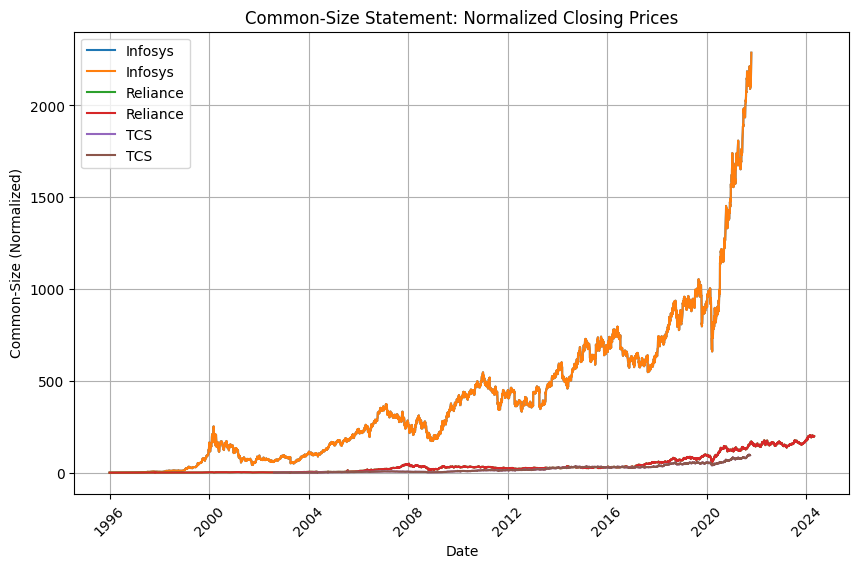

In [99]:
import matplotlib.pyplot as plt

# Normalize the 'close' column of Infosys, Reliance, and TCS to the first entry
df_i['Common-Size'] = df_i['close'] / df_i['close'].iloc[0]
df_r['Common-Size'] = df_r['close'] / df_r['close'].iloc[0]
df_t['Common-Size'] = df_t['close'] / df_t['close'].iloc[0]

# Plot common-size statement for visual comparison
plt.figure(figsize=(10, 6))

# Use the correct 'date' column for plotting
plt.plot(df_i['date'], df_i['Common-Size'], label='Infosys')
plt.plot(df_r['date'], df_r['Common-Size'], label='Reliance')
plt.plot(df_t['date'], df_t['Common-Size'], label='TCS')

plt.legend()
plt.title('Common-Size Statement: Normalized Closing Prices')
plt.xlabel('Date')
plt.ylabel('Common-Size (Normalized)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



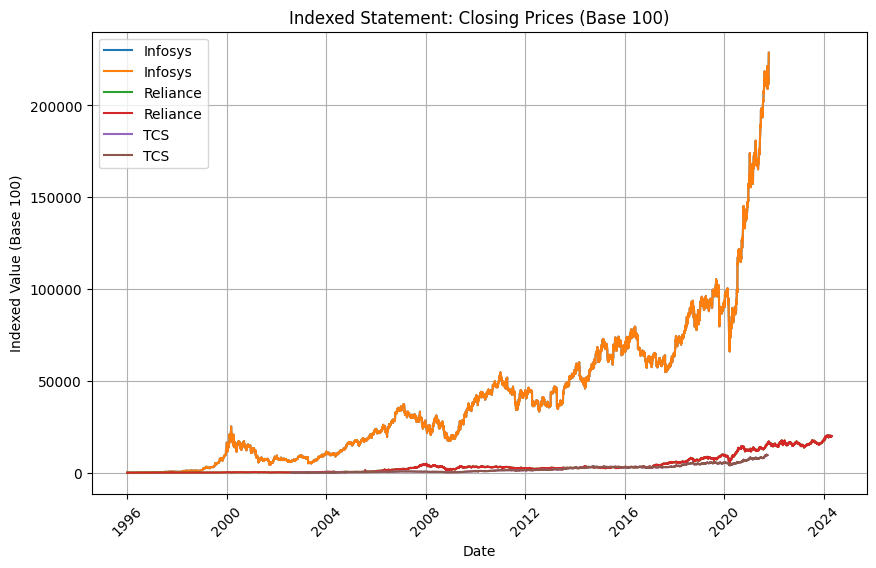

In [101]:
# Set index base value to 100 for Infosys
df_i['Indexed_Close'] = (df_i['close'] / df_i['close'].iloc[0]) * 100

# Set index base value to 100 for Reliance
df_r['Indexed_Close'] = (df_r['close'] / df_r['close'].iloc[0]) * 100

# Set index base value to 100 for TCS
df_t['Indexed_Close'] = (df_t['close'] / df_t['close'].iloc[0]) * 100

# Plot indexed statements
plt.figure(figsize=(10, 6))
plt.plot(df_i['date'], df_i['Indexed_Close'], label='Infosys')  # Corrected column name
plt.plot(df_r['date'], df_r['Indexed_Close'], label='Reliance')  # Corrected column name
plt.plot(df_t['date'], df_t['Indexed_Close'], label='TCS')       # Corrected column name
plt.legend()
plt.title('Indexed Statement: Closing Prices (Base 100)')
plt.xlabel('Date')
plt.ylabel('Indexed Value (Base 100)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Filter the data for the date range 2019 to 2021



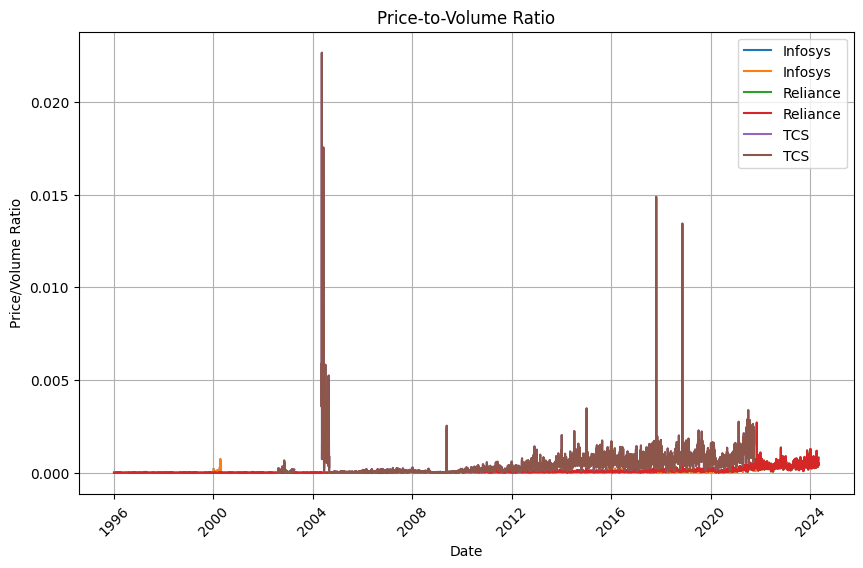

In [106]:


# Ensure proper column names for 'close' and 'volume'
# For Infosys
df_i.columns = df_i.columns.str.lower()  # Convert all columns to lowercase
df_i['price_to_volume'] = df_i['close'] / df_i['volume']

# For Reliance
df_r.columns = df_r.columns.str.lower()
df_r['price_to_volume'] = df_r['close'] / df_r['volume']

# For TCS
df_t.columns = df_t.columns.str.lower()
df_t['price_to_volume'] = df_t['close'] / df_t['volume']

# Plot Price-to-Volume ratios
plt.figure(figsize=(10, 6))
plt.plot(df_i['date'], df_i['price_to_volume'], label='Infosys')
plt.plot(df_r['date'], df_r['price_to_volume'], label='Reliance')
plt.plot(df_t['date'], df_t['price_to_volume'], label='TCS')
plt.legend()
plt.title('Price-to-Volume Ratio')
plt.xlabel('Date')
plt.ylabel('Price/Volume Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



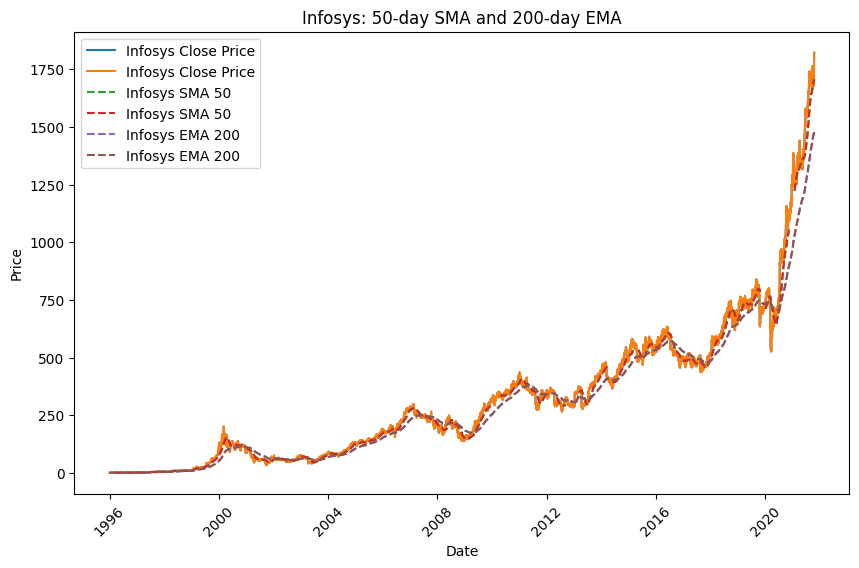

In [107]:
# Calculate the 50-day Simple Moving Average (SMA) for Infosys, Reliance, and TCS
df_i['SMA_50'] = df_i['close'].rolling(window=50).mean()
df_r['SMA_50'] = df_r['close'].rolling(window=50).mean()
df_t['SMA_50'] = df_t['close'].rolling(window=50).mean()

# Calculate the 200-day Exponential Moving Average (EMA)
df_i['EMA_200'] = df_i['close'].ewm(span=200, adjust=False).mean()
df_r['EMA_200'] = df_r['close'].ewm(span=200, adjust=False).mean()
df_t['EMA_200'] = df_t['close'].ewm(span=200, adjust=False).mean()

# Plot Moving Averages for Infosys, Reliance, and TCS
plt.figure(figsize=(10, 6))
plt.plot(df_i['date'], df_i['close'], label='Infosys Close Price')
plt.plot(df_i['date'], df_i['SMA_50'], label='Infosys SMA 50', linestyle='--')
plt.plot(df_i['date'], df_i['EMA_200'], label='Infosys EMA 200', linestyle='--')
plt.legend()
plt.title('Infosys: 50-day SMA and 200-day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [110]:
# Reset the index to avoid duplicate index labels
df_i = df_i.reset_index(drop=True)
df_r = df_r.reset_index(drop=True)
df_t = df_t.reset_index(drop=True)


In [115]:
# Check for duplicates in the index
print(df_i.index.duplicated().sum(), "duplicates in Infosys index")
print(df_r.index.duplicated().sum(), "duplicates in Reliance index")
print(df_t.index.duplicated().sum(), "duplicates in TCS index")
# Check if the 'date' column is 1-dimensional
print(df_i['date'].shape)
print(df_r['date'].shape)
print(df_t['date'].shape)




0 duplicates in Infosys index
0 duplicates in Reliance index
0 duplicates in TCS index
(6501, 2)
(7124, 2)
(4763, 2)


In [120]:
# Drop duplicate 'date' columns (if any)
df_i = df_i.loc[:, ~df_i.columns.duplicated()]
df_r = df_r.loc[:, ~df_r.columns.duplicated()]
df_t = df_t.loc[:, ~df_t.columns.duplicated()]
# Check again to confirm the shape of 'date'
print(df_i['date'].shape)
print(df_r['date'].shape)
print(df_t['date'].shape)

# Set the 'date' column as the index
df_i.set_index('date', inplace=True)
df_r.set_index('date', inplace=True)
df_t.set_index('date', inplace=True)


(6501,)
(7124,)
(4763,)


In [122]:
# Calculate ROI (percentage change from the start to end of 2019-2021)

# Filter the data for the date range 2019 to 2021
df_i_filtered = df_i[(df_i.index >= '2019-01-01') & (df_i.index <= '2021-12-31')]
df_r_filtered = df_r[(df_r.index >= '2019-01-01') & (df_r.index <= '2021-12-31')]
df_t_filtered = df_t[(df_t.index >= '2019-01-01') & (df_t.index <= '2021-12-31')]

# Calculate ROI: (End Price - Start Price) / Start Price * 100
infosys_roi = ((df_i_filtered['close'].iloc[-1] - df_i_filtered['close'].iloc[0]) / df_i_filtered['close'].iloc[0]) * 100
reliance_roi = ((df_r_filtered['close'].iloc[-1] - df_r_filtered['close'].iloc[0]) / df_r_filtered['close'].iloc[0]) * 100
tcs_roi = ((df_t_filtered['close'].iloc[-1] - df_t_filtered['close'].iloc[0]) / df_t_filtered['close'].iloc[0]) * 100

print(f"Infosys ROI (2019-2021): {infosys_roi:.2f}%")
print(f"Reliance ROI (2019-2021): {reliance_roi:.2f}%")
print(f"TCS ROI (2019-2021): {tcs_roi:.2f}%")


Infosys ROI (2019-2021): 173.99%
Reliance ROI (2019-2021): 113.26%
TCS ROI (2019-2021): 99.28%


In [126]:
print(df_i.columns)
print(df_r.columns)
print(df_t.columns)


Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'common-size',
       'indexed_close', 'price_to_volume', 'SMA_50', 'EMA_200'],
      dtype='object')
Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'common-size', 'indexed_close', 'price_to_volume', 'SMA_50', 'EMA_200'],
      dtype='object')
Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'common-size',
       'indexed_close', 'price_to_volume', 'SMA_50', 'EMA_200'],
      dtype='object')


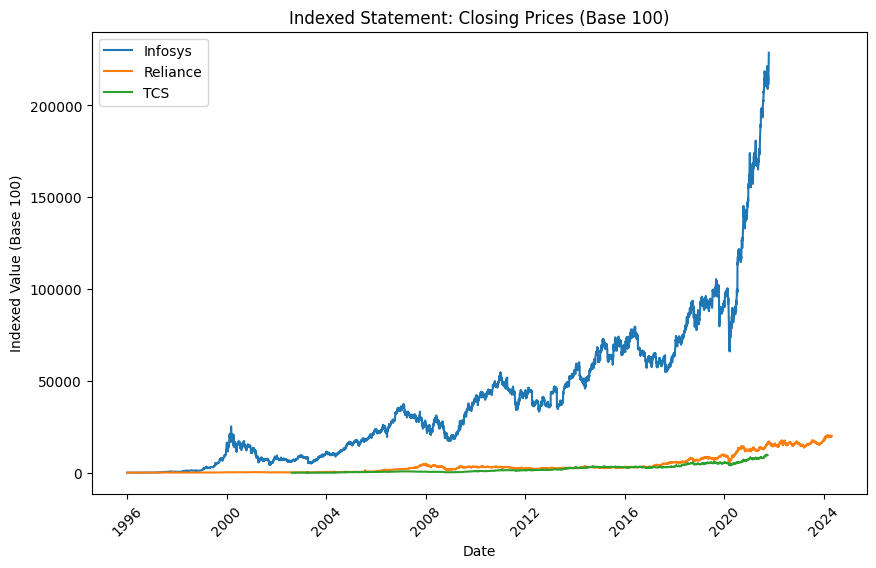

In [127]:
# Use 'indexed_close' for plotting
plt.figure(figsize=(10, 6))
plt.plot(df_i.index, df_i['indexed_close'], label='Infosys')
plt.plot(df_r.index, df_r['indexed_close'], label='Reliance')
plt.plot(df_t.index, df_t['indexed_close'], label='TCS')

plt.legend()
plt.title('Indexed Statement: Closing Prices (Base 100)')
plt.xlabel('Date')
plt.ylabel('Indexed Value (Base 100)')
plt.xticks(rotation=45)
plt.show()



In [128]:
# Calculate volatility (standard deviation) for each company (2019-2021)
infosys_volatility = df_i_filtered['close'].pct_change().std() * 100
reliance_volatility = df_r_filtered['close'].pct_change().std() * 100
tcs_volatility = df_t_filtered['close'].pct_change().std() * 100

print(f"Infosys Volatility (2019-2021): {infosys_volatility:.2f}%")
print(f"Reliance Volatility (2019-2021): {reliance_volatility:.2f}%")
print(f"TCS Volatility (2019-2021): {tcs_volatility:.2f}%")


Infosys Volatility (2019-2021): 1.97%
Reliance Volatility (2019-2021): 2.19%
TCS Volatility (2019-2021): 1.74%


<ipython-input-128-d8d45d8515bb>:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  infosys_volatility = df_i_filtered['close'].pct_change().std() * 100
<ipython-input-128-d8d45d8515bb>:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  tcs_volatility = df_t_filtered['close'].pct_change().std() * 100


               Infosys     Reliance          TCS
date                                            
2019-01-01  665.049988  1024.966919  1902.800049
2019-01-02  669.049988  1011.617737  1923.300049
2019-01-03  669.150024   999.137085  1899.949951
2019-01-04  661.049988  1004.531616  1876.849976
2019-01-07  671.700012  1010.109070  1897.900024


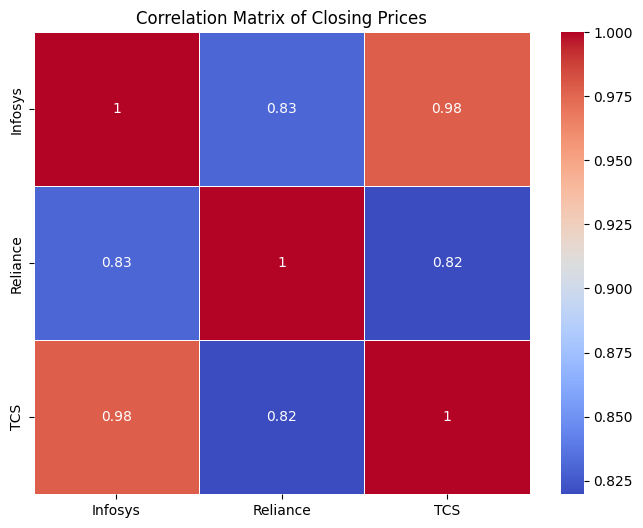

In [134]:
# Ensure the dataframes are aligned by date
df_combined = pd.concat([df_i_filtered['close'], df_r_filtered['close'], df_t_filtered['close']], axis=1, join='inner')

# Rename the columns for clarity
df_combined.columns = ['Infosys', 'Reliance', 'TCS']

# Check the combined dataframe
print(df_combined.head())

# Now you can proceed with correlation analysis
correlation_matrix = df_combined.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Closing Prices")
plt.show()



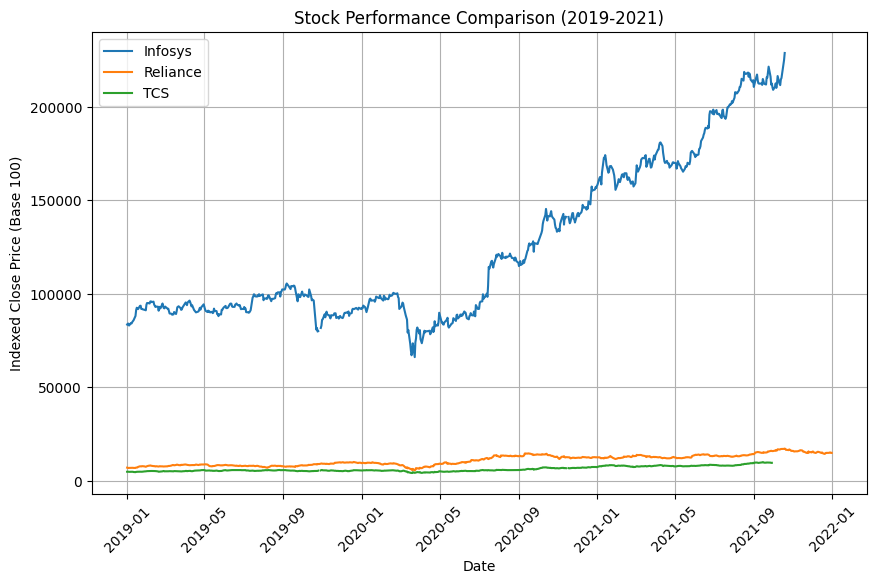

In [137]:
# Filter data for the selected time range (2019-2021)
df_i_filtered = df_i[(df_i.index >= '2019-01-01') & (df_i.index <= '2021-12-31')]
df_r_filtered = df_r[(df_r.index >= '2019-01-01') & (df_r.index <= '2021-12-31')]
df_t_filtered = df_t[(df_t.index >= '2019-01-01') & (df_t.index <= '2021-12-31')]

# Plot all closing prices together for comparison
plt.figure(figsize=(10, 6))
plt.plot(df_i_filtered.index, df_i_filtered['indexed_close'], label='Infosys')
plt.plot(df_r_filtered.index, df_r_filtered['indexed_close'], label='Reliance')
plt.plot(df_t_filtered.index, df_t_filtered['indexed_close'], label='TCS')
plt.legend()
plt.title('Stock Performance Comparison (2019-2021)')
plt.xlabel('Date')
plt.ylabel('Indexed Close Price (Base 100)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




           Infosys  Reliance       TCS
Infosys   1.000000  0.830555  0.977633
Reliance  0.830555  1.000000  0.819668
TCS       0.977633  0.819668  1.000000


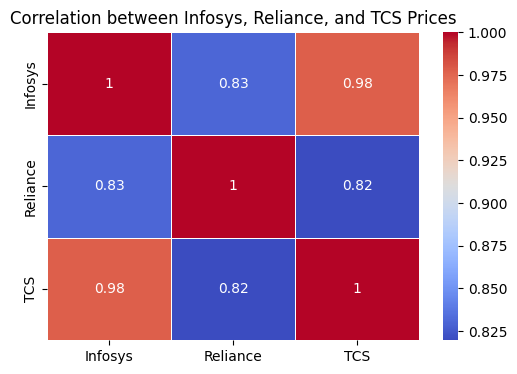

In [139]:
# Align the data by dates using inner join
df_combined = pd.concat([df_i_filtered['close'], df_r_filtered['close'], df_t_filtered['close']], axis=1, join='inner')

# Rename the columns for clarity
df_combined.columns = ['Infosys', 'Reliance', 'TCS']

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation between Infosys, Reliance, and TCS Prices')
plt.show()
